In [82]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn import manifold, datasets
from scipy import sparse, io
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import mat4py
from LE import LE
import glob
import pandas as pd

In [83]:
PPI = io.loadmat('PPI.mat')
pip_src = mat4py.loadmat('PPI.mat')
# print(PPI)
# data = digits.shape
print(PPI['G']['am'][0][0][0].shape)
print(PPI['G']['al'][0][0][0][0].shape)
print(PPI['G']['nl'][0][0][0][0][0][0].shape)

print(PPI['G']['am'].shape)
print(PPI['G']['al'].shape)
print(PPI['G']['nl'].shape)

print(PPI['labels'].shape)
# labels = PPI.labels
print(pip_src['G'].keys())

data = PPI['labels']
print(data.shape[1])

(161,)
(1, 66)
(1,)
(1, 86)
(1, 86)
(1, 86)
(86, 1)
dict_keys(['am', 'al', 'nl'])
1


In [71]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [72]:
# number of points
# n = data_.shape[0]

# dimension of embedding
d = 3

# number of neighbours
k = 150
path = 'PPI'
files = glob.glob(path + '/*.csv')

lists = []

for filename in files:
    df = pd.read_csv(filename, index_col=None, header=None)
    lists.append(df)
    
frame = pd.concat(lists, axis=0, ignore_index=True)
data_ = clean_dataset(frame)

labels = pd.read_csv('ppi_labels.csv').T
# labels = labels.values.flatten()

data_, labels = data_.align(labels, axis=1, fill_value=0)

labels = labels.T
print(labels.shape)
print(data_.shape)


(232, 1)
(232, 232)


In [75]:
le_ppi = LE(data_, eps = 33, dim = 3, graph = 'eps', weights = 'heat kernel', 
               sigma = 5, laplacian = 'symmetrized', opt_eps_jumps = 1.2)

print(le_ppi)
Y_ppi = le_ppi.transform()
print(Y_ppi.shape)

(232, 4)


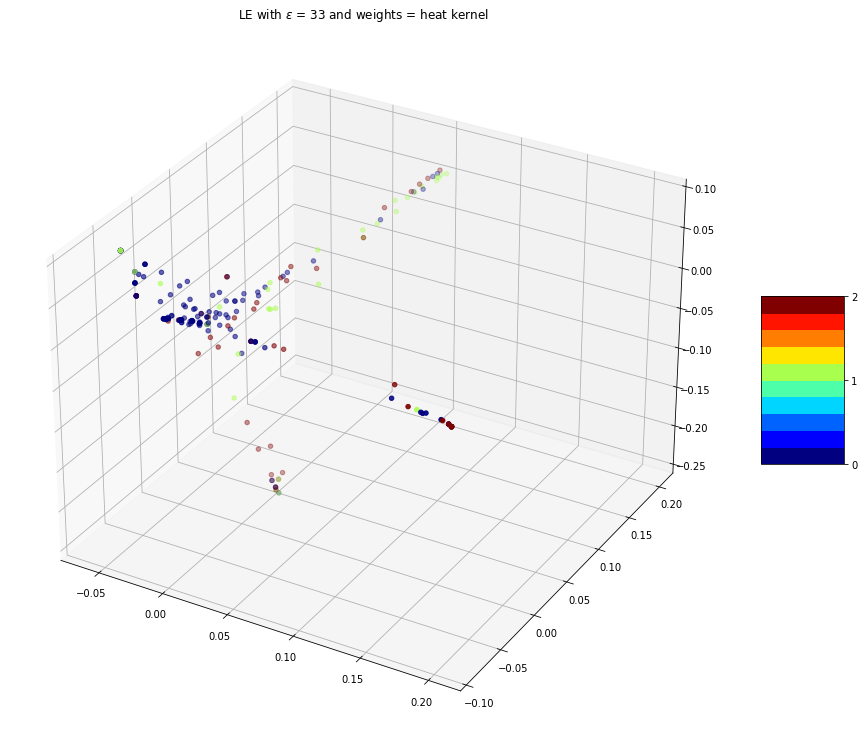

In [76]:
fig = plt.figure(figsize = (15,18))
ax = fig.add_subplot(111, projection='3d')
ax3d = ax.scatter(Y_ppi[:, 0], Y_ppi[:, 1], Y_ppi[:, 2], c=labels,cmap=plt.cm.get_cmap('jet', 10))
fig.colorbar(ax3d, ticks=range(10), aspect = 2, fraction = 0.1)
plt.title('LE with $\epsilon$ = {} and weights = {}'.format(le_ppi.eps, le_ppi.weights))
plt.show()

In [77]:
X, color = datasets.make_swiss_roll(n_samples=labels.shape[0], random_state = 2456)
# (n_samples=100, *, noise=0.0, random_state=None)

Text(0.5, 0, 'Z Label')

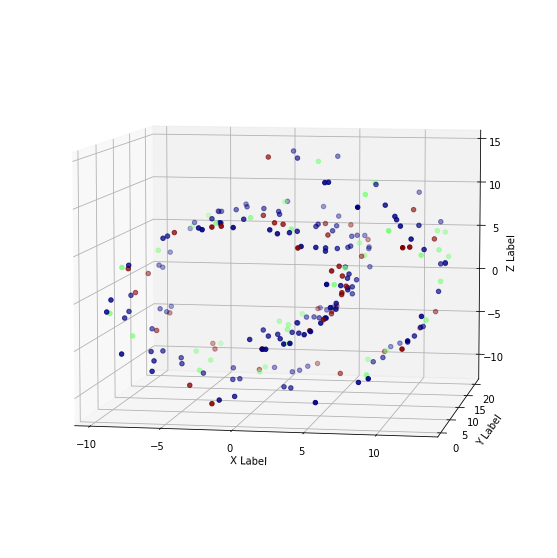

In [78]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(7, -80)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap=plt.cm.jet)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')